# The Ozone Cycle and the Ozone Hole

The ozone cycle is a rich area of study in atmospheric chemistry. One of the most important contributions that atmospheric chemistry has made is the observation and explanation of the "ozone hole" that emerges in the Southern Hemisphere.

In 1974, Mario Molina and F. Sherwood Rowland predicted that halogens could destroy ozone molecules in the stratosphere. In 1985, Farman, Gardiner, and Shanklin reported severe springtime decreases in ozone over Antarctica, verifying their predictions. As a result of their work, Molina and Rowland shared the Nobel Prize in Chemistry.

Depletion in the stratospheric ozone layer that protects Earth from harmful ultraviolet radiation was a looming public health and ecological catastrophe. Building on these findings, Susan Solomon and her colleagues conducted crucial research in 1986 that definitively linked the ozone hole to human-produced CFCs, demonstrating how unique atmospheric conditions over Antarctica create an environment where these chemicals are particularly destructive to ozone.

![Ozone hole over Antarctica](https://aura.gsfc.nasa.gov/ozoneholeposter/24x37_OZONEposter_front.jpg)
*The ozone hole in antarctica, viewed from space. Observations like these were important in shaping public policy and the regulation of chlorofluorocarbons (CFCs).*

**Chemical Kinetics**

*Motivation:* Our study starts with some of the earliest attempts to understand the oxygen-ozone cycle, called the *Chapman cycle* that takes place in the stratosphere in the presence of UV light. In the first step, the ozone molecule photodissociates,

$O_3 \xrightarrow{k_1} O_2 + O\cdot$

Using the law of mass action, the ozone molecule decomposes according to the rate law

$\frac{d[O_3]}{dt} = -k_1 [O_3]$,

where $k_1$ is a first-order rate constant proportional to the amount of UV light. The rate constant $k_1$ has units of inverse time.

**Question:** *Given an initial concentration of ozone at time zero, $[O_3(0)]$, what will the concentration be at time $t$?*

Well, this one is pretty easy. The solution is $[O_3(t)] = e^{-k_1t}[O_3(0)]$, which you can verify by substitution.

This wouldn't be much of a cycle unless there was another step. Indeed, the oxygen radical can react with ozone,

$O\cdot + O_3 \xrightarrow{k_2} 2 O_2$.

Now there are three species, not just one, and the rate law for $[O_3(t)]$ changes to 

\begin{equation}
\frac{d[O_3]}{dt} = -k_1[O_3] - k_2[O\cdot][O_3].
\end{equation}

Unless the concentration of $[O\cdot]$ is constant, the differential equations that describe the three species $[O_2]$, $[O\cdot]$ and $[O_3]$ are a system of nonlinear coupled differential equations-and there is no way to solve them exactly. Instead, we will develop numerical methods to solve it to *arbitrary numerical accuracy.* 

**Numerical Soluitions to Differential Equations**

We will begin our study of differential equations by considering one variable, y = y(t) that obeys the differential equation
\begin{equation}
\boxed{\frac{dy}{dt} = f(y(t),t)}.
\end{equation}

Rather than trying to find a continuous function---which is hard---imagine breaking up the time axis into points $0,t_1,t_2,\cdots, t_{N}$ separated by the step size $h$, so that $t_n = nh$. The strategy is to seek a samples of the function $\overline{y}_n$ that are as close to the real solution, $y(t_n)$ as possible. This is much easier.

It will be helpful to distinguish between the true solution $y(t)$ sampled at points $t_n$, and our approximations to $y(t)$ sampled at the same points. I will denote $y_n = y(t_n)$ as the exact solution to  the problem and $\overline{y}_n = \overline{y}_n(t_n)$ as an approximate solution, sampled at the same points. 

**Initial value problems**

Differential equations of this type are a class of *initial value problems.* While we will analyze methods for one variable, they apply relatively straightforwardly to multiple variables, and to differential equations whose orders are higher than one. If you have a second order differential equation, it is easy to convert it to a first-order differential equation. For example, say you have a force law $f(y(t))$, where $y(t)$ is the position of a particle of mass $m$ at time $t$. Newton's law, $f = ma$ yields a second-order differential equation for the trajectory $y(t)$.

\begin{equation}
m \frac{d^2y(t)}{dt^2} = f(y(t))
\end{equation}

If $f(y)$ is a nonlinear function of $y$, you can't solve this exactly, except in some special cases. To turn it the second-order differential equation for one variable, introduce the momentum $p = m \frac{dy(t)}{dt}$, so that we now have *two coupled* first-order differential equations,
$$
\frac{dy}{dt} = \frac{p}{m} \\
\frac{dp}{dt} = f(y)
$$

If we define the vector $\bm{x}(t) \equiv \begin{pmatrix} y \\ p \end{pmatrix}$, then we have the equation
$$
\frac{d \bm x}{dt} = {\bm F}({\bm x},t).
$$
which is just a vector-valued version of the problem for one variable, where I have to specify two initial conditions: one on the position and one on the momentum.

Evidently, chemical rate equations are also vector-valued first-order differential equations. I specify the concentrations of all species in a vector ${\bm x}(t) = \begin{pmatrix} [A(t)] \\ [B(t)] \\ \cdots \end{pmatrix}$ and solve for the nonlinear coupled differential equations.

These are related to but distinct from *boundary value problems*, though many of the numerical techniques we develop here for initial value problems have analogs in boundary value problems too.


**Informal, intuitive approach:** Start with the most rudimentary integrator to numerically solve a differential equation. *Euler's* method is based on a discretization of Fermat's definition of the derivative.

$\frac{dy}{dt} = \lim_{h \to 0} \frac{y(t + h) - y(t)}{h}$.

If we interpret $h$ not as an infintesimal but instead as the stepsize, Fermat's rule gives us a simple approximation formula,
\begin{equation}
y(t+h) \approx y(t) + h f(y(t),t).
\end{equation}


Replacing $y(t)$ with $\overline{y}(t)$ gives a one-step approximation to the function $y(t)$ the **explicit forward Euler method**,

\begin{equation}
\overline{y}_{n+1} = \overline{y}_n + h f(\overline{y}_n,t_n)
\end{equation}

Note that I could have also approximated $f(y(t))$ by its value at $t+h$, which would give 

\begin{equation}
\overline{y}_{n+1} = \overline{y}_n + hf(\overline{y}_{n+1},t_{n+1}).
\end{equation}

This is still a one-step formula, but it is **implicit** because I have to solve for $\overline{y}_{n+1}$, which usually involves solving an implicit equation. For this reason, this is called the **implicit backward Euler method**. 

Let $y(t) = \overline{y}(t) + \epsilon(t)$ so that $\epsilon(t) = y(t) - \overline{y}(t)$ is the error. Replacing $y$ with $\overline{y}$ gives $f(y(t),t) = f(\overline{y}(t) + \epsilon(t),t) \approx f(\overline{y},t)$. 

**Stability** For a given solution method, how does the error scale with increasing timestep?

Consider error produced at step $n$ with $\overline{y}_n$ chosen so that $\overline{y}'_n = f(\overline{y}_n,t_n)$, then the error obeys a first-order linear differential equation,

$$
\frac{d\epsilon(t)}{dt} = J_n \epsilon(t),
$$
The constant $J_n \equiv \frac{df}{dy}|_{y = \overline{y},t = t_n}$ is the *Jacobian* evaluated at point $(t_n,\overline{y}_n)$.

The forward Euler method gives 
$$
\epsilon_{n+1} = (1+J_n h)\epsilon_n.
$$.
After $N$ steps, the relative error is $|\epsilon_N/\epsilon_n|$ = $(1+ J_n h)^N = exp(N\ln(J_n h))$. If $J_n h < 1$, the error goes to zero as $N\rightarrow \infty$ and we're in business. Otherwise, the error explodes as $N\rightarrow \infty$, and the solution is *unstable*. The forward Euler method is therefore *conditionally stable*, with the condition that $J_n h < 1$.

The backward Euler method gives
$$
\epsilon_{n+1} = \epsilon_n + h J_{n}\epsilon_{n+1},
$$
or
$$
\epsilon_{n+1} = \frac{\epsilon_n}{1 - h J_n}
$$
After $N$ steps the relative error grows as $\left(\frac{1}{1 - h J_n}\right)^N$. This is only stable if $J_n h > 1$. Therefore the method is also *conditionally stable*, but its region of stability is *complementary to* the forward Euler method. Rather than being stable for small steps, it is stable for large steps.


**Forward and backward Euler methods for a linear differential equation.**

Before getting too fancy, let's use our methods to solve an equation for which we already know the answer. 

Consider the case where $f(y(t),t)$ is linear in $y(t)$, $f(y(t),t) = -\alpha y(t)$, with real-valued $\alpha$.

The solution is $y(t) = y(0)e^{-\alpha t}$.

The forward Euler formula gives

$\overline{y}_{n+1} = \overline{y}_n - h \alpha \overline{y}_n.$

Without loss of generality, we can choose to write $y(t)$ in terms of $y(0)$ and time in units of inverse $\alpha$, so that $\alpha t$ is a dimensionless time.

Let's code it up.

In [46]:
using Pkg
Pkg.add("Plots")
Pkg.add("Test")

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.10/Project.toml`
  No Changes to `~/.julia/environments/v1.10/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.10/Project.toml`
  No Changes to `~/.julia/environments/v1.10/Manifest.toml`


**Code Design:** We're going to try a bunch of numerical approximation methods called *integrators* and plot solutions, or trajectories, on a grid. We'll want a function to compute a trajectory for a given initial condition $y_0$ for a total time $T$ and a timestep $h$. That means we should write a function that computes the trajectory like so:

$\text{function trajectory}(integrator,f,y_0,T,h)$

The return values of the function should be the time grid and the trajectory.

Similarly, we should expect the integrator to take as its input the function $f = f(y(t),t)$, $y(t)$. $t$, and the step size $h$.

$\text{function integrator}(f,y,t,h)$.

I want to do this in one of two ways so that you have two different types of design strategies.

* 1. Define functions as above, taking several arguments. The advantage is that this is simple to write and fast to implement.
* 2. Use Julia's struct and type paradigms to define custom data types. The advantage is that this way is easier to use.

These two approaches are not mutually exclusive--we can use the first to implement the second and in fact, we can write a test to confirm that the second implementation works.

In [7]:
## The function definitions way, #1. This is good for
## beginners or for quick testing.

function trajectory(integrator::Function, f::Function, y₀::Float64, T::Float64, h::Float64)
    # Calculate number of steps needed
    nsteps = floor(Int, T/h) + 1
    
    # Pre-allocate arrays
    t = zeros(nsteps)
    y = zeros(nsteps)
    
    # Set initial conditions
    y[1] = y₀
    t[1] = 0.0
    
    # Time evolution using iteration.
    for i in 1:nsteps-1
        y[i+1] = integrator(f, y[i], t[i], h)
        t[i+1] = t[i] + h
    end
    
    return y, t
end

function forward_euler(f::Function, y::Float64, t::Float64, h::Float64)
    return y + h*f(y, t)
end

forward_euler (generic function with 1 method)

So now let's build our programming chops a bit and do option #2. We'll start by defining *abstract types*, ODEIntegrator and ODEProblem. Forward Euler will be a subtype of a more general ODEIntegrator. We will also want to keep our solution in terms of t and y, so we'll need to make a struct for that one.

In [17]:
abstract type ODEIntegrator end
abstract type ODEProblem end


struct ODESolution
    t::Vector{Float64}
    y::Vector{Float64}
end

struct ODESystem <: ODEProblem
    f::Function #Forcing function f = f(y,t)
    y₀::Float64 #Initial condition
    T::Float64 #Final time
    h::Float64 #Time step
end

#Implementation of the solve function. It is a fairly general function that can be used with any ODEProblem and ODEIntegrator.
function solve(problem::ODEProblem,integrator::ODEIntegrator)
    t = 0.0:problem.h:problem.T
    y = zeros(length(t))
    y[1] = problem.y₀
    for i in 1:length(t)-1
        y[i+1] = step(integrator,problem.f,y[i],t[i],problem.h)
    end
    return ODESolution( collect(t), y)
end

struct ForwardEuler <: ODEIntegrator end

#Method implementation for Forward Euler
function step(::ForwardEuler, f, y::Float64, t::Float64, h::Float64)
    return y + h*f(y,t)
end


step (generic function with 1 method)

Test the two methods to make sure that they agree with one another and that we haven't gotten so fancy that we have made mistakes.

In [18]:
using Test

# Test parameters
y₀ = 1.0
T = 5.0
h = 0.5
f(y,t) = -y

# Get solution using function-based approach
y1, t1 = trajectory(forward_euler, f, y₀, T, h)

# Get solution using type-based approach
problem = ODESystem(f, y₀, T, h)
solution = solve(problem, ForwardEuler())
y2, t2 = solution.y, solution.t

# Test that both approaches give the same results
@testset "Forward Euler Implementation Comparison" begin
    @test length(y1) == length(y2)
    @test length(t1) == length(t2)
    @test all(isapprox.(y1, y2, rtol=1e-10))
    @test all(isapprox.(t1, t2, rtol=1e-10))
end

Test Summary:                           | Pass  Total  Time
Forward Euler Implementation Comparison |    4      4  0.7s


Test.DefaultTestSet("Forward Euler Implementation Comparison", Any[], 4, false, false, true, 1.737402042301202e9, 1.737402042992324e9, false, "/Users/joeleaves/github/CHEM-5555-Examples-Solutions/jl_notebook_cell_df34fa98e69747e1a8f8a730347b8e2f_X34sZmlsZQ==.jl")

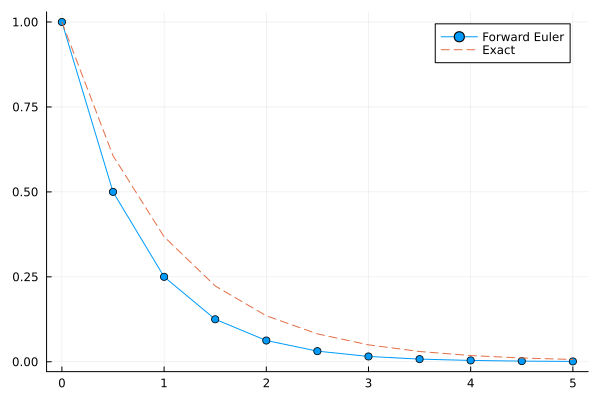

In [24]:
#OK, now let's compare the result from forward Euler to the exact solution:

f(y,t) = -y
problem = ODESystem(f,1.0,5.0,0.5)
solution = solve(problem,ForwardEuler())
plot(solution.t,solution.y,label="Forward Euler",marker=:circle)

plot!(solution.t,exp.(-solution.t),label="Exact",linestyle=:dash)


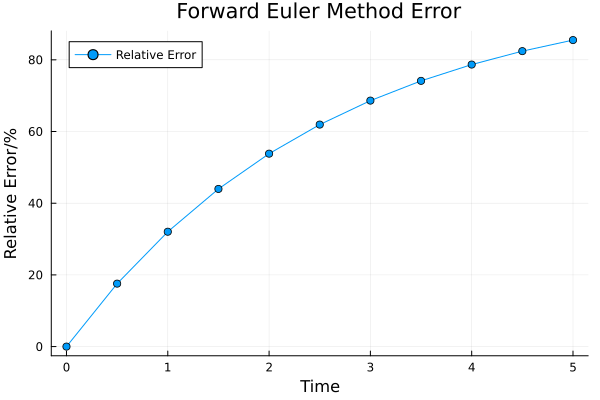

In [28]:

# Calculate and plot relative error
relative_error = abs.(solution.y - exp.(-solution.t)) ./ exp.(-solution.t)
plot(solution.t, relative_error*100, label="Relative Error", 
    xlabel="Time", ylabel="Relative Error/%",
    marker=:circle, title="Forward Euler Method Error")

After all this work, the results suck! Yes, the solution is stable, but it converges to an answer that is *inaccurate!* It does not match the exact result at all, and the relative error grows as time grows, almost to 80%!

How does backwards Euler fare?

**Supplement: Linearity**

Linear differential equations are an important subclass of differential equations.

When $f(y(t),t)$ is linear in y(t), the differential equation is also linear. A linear differential operator with solution $y(t)$ can be written as ${\cal L}(t)y(t) = 0$. Linear operators have the property that linear combinations of solutions are also solutions. In other words, for constants $a$ and $b$ with solutions $y_1(t)$ and $y_2(t)$ the differential operator is linear if and only if

\begin{equation}
{\cal L}(t)\left[ a y_1(t) + b y_2(t)\right] = a{\cal L}(t)y_1(t) + b{\cal L}(t)y_2(t)
\end{equation}

If $f(y(t),t) = u(t)y(t)$, then ${\cal L}(t)y(t) = 0$, where ${\cal L}(t)$ is the operator $\frac{d}{dt} - u(t)$. With this definition,

${\cal L}(t)\left[ a y_1(t) + b y_2(t)\right] = a{\cal L}(t)y_1(t) + b{\cal L}(t)y_2(t)$.

If, however, $f(y(t),t) = y^2(t)$, there is no way to define a differential operator that obeys the condition for linearity, since if you were to try the differential operator would depend on the solution. This is an example of a *nonliner differential equation*, and in general, finding exact solutions to them is very difficult. We will be interested, instead, in finding optimal approximations to them.
